In [ ]:
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob

# Paths to your folders
fake_path = '/content/drive/MyDrive/fakefaces_data/*.mp4'
real_path = '/content/drive/MyDrive/realfaces_data/*.mp4'

# Get all video files
fake_video_files = glob.glob(fake_path)
real_video_files = glob.glob(real_path)

# Print counts
print(f"Number of FAKE videos: {len(fake_video_files)}")
print(f"Number of REAL videos: {len(real_video_files)}")

# Optionally print a few filenames to verify
print("\nSample FAKE video files:")
print(fake_video_files[:5])

print("\nSample REAL video files:")
print(real_video_files[:5])


Number of FAKE videos: 0
Number of REAL videos: 240

Sample FAKE video files:
[]

Sample REAL video files:
['/content/drive/MyDrive/realfaces_data/227.mp4', '/content/drive/MyDrive/realfaces_data/139.mp4', '/content/drive/MyDrive/realfaces_data/18.mp4', '/content/drive/MyDrive/realfaces_data/212.mp4', '/content/drive/MyDrive/realfaces_data/85.mp4']


In [ ]:
import glob
import torch
from torchvision import transforms
import os
import numpy as np
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Function to extract frames from a video
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    success = True
    while success:
        success, image = vidObj.read()
        if success and image is not None:
            yield image

# Function to validate a video (check if 20 frames can be extracted and processed)
def validate_video(vid_path, train_transforms, count=20):
    frames = []
    for i, frame in enumerate(frame_extract(vid_path)):
        try:
            frame = train_transforms(frame)
            frames.append(frame)
        except Exception as e:
            raise RuntimeError(f"Transform error in {vid_path}: {e}")
        if len(frames) == count:
            break
    if len(frames) < count:
        raise RuntimeError(f"Not enough valid frames in {vid_path}")
    frames = torch.stack(frames)
    return frames

# Define transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Collect all preprocessed face-only video paths
video_files = glob.glob('/content/drive/MyDrive/fakefaces_data/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/realfaces_data/*.mp4')

print("Total number of videos:", len(video_files))

# Run validation
corrupted_videos = []
for idx, path in enumerate(tqdm(video_files)):
    try:
        validate_video(path, train_transforms)
    except Exception as e:
        print(f"[{idx+1}] Corrupted video: {path} -> {e}")
        corrupted_videos.append(path)

print("\nSummary:")
print("✅ Valid videos:", len(video_files) - len(corrupted_videos))
print("❌ Corrupted videos:", len(corrupted_videos))


Total number of videos: 240


  1%|          | 2/240 [00:01<02:23,  1.66it/s]

[2] Corrupted video: /content/drive/MyDrive/realfaces_data/139.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/139.mp4


 12%|█▏        | 28/240 [00:03<00:11, 18.88it/s]

[18] Corrupted video: /content/drive/MyDrive/realfaces_data/151.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/151.mp4
[19] Corrupted video: /content/drive/MyDrive/realfaces_data/285.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/285.mp4
[22] Corrupted video: /content/drive/MyDrive/realfaces_data/77.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/77.mp4
[30] Corrupted video: /content/drive/MyDrive/realfaces_data/181.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/181.mp4
[34] Corrupted video: /content/drive/MyDrive/realfaces_data/97.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/97.mp4


 15%|█▌        | 37/240 [00:03<00:07, 27.05it/s]

[37] Corrupted video: /content/drive/MyDrive/realfaces_data/210.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/210.mp4


 18%|█▊        | 44/240 [00:04<00:10, 18.98it/s]

[41] Corrupted video: /content/drive/MyDrive/realfaces_data/255.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/255.mp4
[44] Corrupted video: /content/drive/MyDrive/realfaces_data/261.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/261.mp4
[45] Corrupted video: /content/drive/MyDrive/realfaces_data/221.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/221.mp4
[46] Corrupted video: /content/drive/MyDrive/realfaces_data/145.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/145.mp4
[50] Corrupted video: /content/drive/MyDrive/realfaces_data/319.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/319.mp4


 27%|██▋       | 64/240 [00:05<00:09, 18.11it/s]

[55] Corrupted video: /content/drive/MyDrive/realfaces_data/106.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/106.mp4
[57] Corrupted video: /content/drive/MyDrive/realfaces_data/277.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/277.mp4
[62] Corrupted video: /content/drive/MyDrive/realfaces_data/195.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/195.mp4
[67] Corrupted video: /content/drive/MyDrive/realfaces_data/315.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/315.mp4
[68] Corrupted video: /content/drive/MyDrive/realfaces_data/148.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/148.mp4
[72] Corrupted video: /content/drive/MyDrive/realfaces_data/282.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/282.mp4


 38%|███▊      | 90/240 [00:06<00:04, 32.10it/s]

[87] Corrupted video: /content/drive/MyDrive/realfaces_data/184.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/184.mp4
[89] Corrupted video: /content/drive/MyDrive/realfaces_data/205.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/205.mp4


 41%|████▏     | 99/240 [00:06<00:03, 39.93it/s]

[91] Corrupted video: /content/drive/MyDrive/realfaces_data/323.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/323.mp4
[93] Corrupted video: /content/drive/MyDrive/realfaces_data/126.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/126.mp4
[101] Corrupted video: /content/drive/MyDrive/realfaces_data/134.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/134.mp4
[102] Corrupted video: /content/drive/MyDrive/realfaces_data/351.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/351.mp4
[105] Corrupted video: /content/drive/MyDrive/realfaces_data/6.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/6.mp4


 49%|████▉     | 117/240 [00:06<00:02, 55.57it/s]

[112] Corrupted video: /content/drive/MyDrive/realfaces_data/169.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/169.mp4
[113] Corrupted video: /content/drive/MyDrive/realfaces_data/47.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/47.mp4
[117] Corrupted video: /content/drive/MyDrive/realfaces_data/81.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/81.mp4
[120] Corrupted video: /content/drive/MyDrive/realfaces_data/70.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/70.mp4
[122] Corrupted video: /content/drive/MyDrive/realfaces_data/107.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/107.mp4
[124] Corrupted video: /content/drive/MyDrive/realfaces_data/224.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/224.mp4


 59%|█████▉    | 142/240 [00:07<00:02, 45.33it/s]

[128] Corrupted video: /content/drive/MyDrive/realfaces_data/294.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/294.mp4
[133] Corrupted video: /content/drive/MyDrive/realfaces_data/117.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/117.mp4
[137] Corrupted video: /content/drive/MyDrive/realfaces_data/12.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/12.mp4
[140] Corrupted video: /content/drive/MyDrive/realfaces_data/247.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/247.mp4
[141] Corrupted video: /content/drive/MyDrive/realfaces_data/8.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/8.mp4


 70%|██████▉   | 167/240 [00:07<00:01, 64.69it/s]

[150] Corrupted video: /content/drive/MyDrive/realfaces_data/299.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/299.mp4
[155] Corrupted video: /content/drive/MyDrive/realfaces_data/288.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/288.mp4
[159] Corrupted video: /content/drive/MyDrive/realfaces_data/15.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/15.mp4
[165] Corrupted video: /content/drive/MyDrive/realfaces_data/234.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/234.mp4
[169] Corrupted video: /content/drive/MyDrive/realfaces_data/59.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/59.mp4


 76%|███████▋  | 183/240 [00:07<00:01, 47.98it/s]

[176] Corrupted video: /content/drive/MyDrive/realfaces_data/76.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/76.mp4
[183] Corrupted video: /content/drive/MyDrive/realfaces_data/162.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/162.mp4
[185] Corrupted video: /content/drive/MyDrive/realfaces_data/262.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/262.mp4
[186] Corrupted video: /content/drive/MyDrive/realfaces_data/263.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/263.mp4


 87%|████████▋ | 209/240 [00:08<00:00, 44.01it/s]

[191] Corrupted video: /content/drive/MyDrive/realfaces_data/281.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/281.mp4
[192] Corrupted video: /content/drive/MyDrive/realfaces_data/112.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/112.mp4
[193] Corrupted video: /content/drive/MyDrive/realfaces_data/138.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/138.mp4
[195] Corrupted video: /content/drive/MyDrive/realfaces_data/127.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/127.mp4
[208] Corrupted video: /content/drive/MyDrive/realfaces_data/28.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/28.mp4
[209] Corrupted video: /content/drive/MyDrive/realfaces_data/362.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/362.mp4
[210] Corrupted video: /content/drive/MyDrive/realfaces_data/125.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_

 95%|█████████▍| 227/240 [00:09<00:00, 24.88it/s]

[214] Corrupted video: /content/drive/MyDrive/realfaces_data/361.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/361.mp4
[216] Corrupted video: /content/drive/MyDrive/realfaces_data/69.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/69.mp4
[218] Corrupted video: /content/drive/MyDrive/realfaces_data/176.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/176.mp4
[219] Corrupted video: /content/drive/MyDrive/realfaces_data/317.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/317.mp4
[221] Corrupted video: /content/drive/MyDrive/realfaces_data/280.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/280.mp4
[222] Corrupted video: /content/drive/MyDrive/realfaces_data/248.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/248.mp4
[225] Corrupted video: /content/drive/MyDrive/realfaces_data/246.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_

 99%|█████████▉| 237/240 [00:09<00:00, 32.76it/s]

[233] Corrupted video: /content/drive/MyDrive/realfaces_data/61.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/61.mp4
[234] Corrupted video: /content/drive/MyDrive/realfaces_data/161.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/161.mp4
[235] Corrupted video: /content/drive/MyDrive/realfaces_data/166.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/166.mp4
[236] Corrupted video: /content/drive/MyDrive/realfaces_data/314.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/314.mp4
[239] Corrupted video: /content/drive/MyDrive/realfaces_data/303.mp4 -> Not enough valid frames in /content/drive/MyDrive/realfaces_data/303.mp4


100%|██████████| 240/240 [00:10<00:00, 22.75it/s]


Summary:
✅ Valid videos: 173
❌ Corrupted videos: 67


In [ ]:
# delete corrupted videos
for bad_vid in corrupted_videos:
    try:
        os.remove(bad_vid)
        print("Deleted:", bad_vid)
    except:
        print("Failed to delete:", bad_vid)

Deleted: /content/drive/MyDrive/realfaces_data/139.mp4
Deleted: /content/drive/MyDrive/realfaces_data/151.mp4
Deleted: /content/drive/MyDrive/realfaces_data/285.mp4
Deleted: /content/drive/MyDrive/realfaces_data/77.mp4
Deleted: /content/drive/MyDrive/realfaces_data/181.mp4
Deleted: /content/drive/MyDrive/realfaces_data/97.mp4
Deleted: /content/drive/MyDrive/realfaces_data/210.mp4
Deleted: /content/drive/MyDrive/realfaces_data/255.mp4
Deleted: /content/drive/MyDrive/realfaces_data/261.mp4
Deleted: /content/drive/MyDrive/realfaces_data/221.mp4
Deleted: /content/drive/MyDrive/realfaces_data/145.mp4
Deleted: /content/drive/MyDrive/realfaces_data/319.mp4
Deleted: /content/drive/MyDrive/realfaces_data/106.mp4
Deleted: /content/drive/MyDrive/realfaces_data/277.mp4
Deleted: /content/drive/MyDrive/realfaces_data/195.mp4
Deleted: /content/drive/MyDrive/realfaces_data/315.mp4
Deleted: /content/drive/MyDrive/realfaces_data/148.mp4
Deleted: /content/drive/MyDrive/realfaces_data/282.mp4
Deleted: /co

In [ ]:
#to load preprocessed video to memory

import json
import glob
import numpy as np
import cv2
import copy
import random

# Load preprocessed face-only videos
video_files = glob.glob('/content/drive/MyDrive/fakefaces_data/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/realfaces_data/*.mp4')

# Shuffle to randomize order
random.shuffle(video_files)
random.shuffle(video_files)

# Analyze frame counts
valid_videos = []
frame_count = []

for video_file in video_files:
    cap = cv2.VideoCapture(video_file)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames >= 100:
        valid_videos.append(video_file)
        frame_count.append(total_frames)
    cap.release()

print("✅ Valid videos loaded:", len(valid_videos))
print("🎞️ Frame counts:", frame_count)
print("📊 Total videos with >=100 frames:", len(frame_count))
print("📈 Average frames per video:", np.mean(frame_count))

✅ Valid videos loaded: 105
🎞️ Frame counts: [151, 140, 118, 135, 140, 151, 103, 146, 111, 151, 151, 150, 104, 137, 151, 128, 139, 148, 151, 151, 151, 151, 151, 111, 119, 151, 151, 127, 137, 151, 139, 138, 151, 108, 147, 151, 149, 100, 151, 151, 113, 118, 151, 151, 122, 149, 134, 121, 151, 151, 151, 136, 117, 106, 151, 122, 137, 141, 151, 128, 151, 122, 117, 151, 151, 151, 151, 151, 151, 151, 151, 110, 151, 136, 151, 151, 149, 151, 151, 151, 145, 151, 134, 128, 151, 145, 114, 151, 151, 151, 151, 151, 151, 133, 130, 123, 145, 151, 151, 144, 118, 150, 151, 151, 130]
📊 Total videos with >=100 frames: 105
📈 Average frames per video: 139.92380952380952


In [ ]:
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt
import cv2


class VideoDataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels.copy()  # avoid modifying original df
        self.labels["label"] = self.labels["label"].str.upper().str.strip()  # Normalize
        self.transform = transform
        self.count = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []

        # Extract video filename only
        temp_video = os.path.basename(video_path)

        # Look up label using 'file_name' column
        label_row = self.labels[self.labels["file_name"] == temp_video]

        if label_row.empty:
            raise ValueError(f"Label not found for video: {temp_video}")

        label_value = label_row["label"].values[0]
        label = 0 if label_value == 'FAKE' else 1

        # Extract frames
        for i, frame in enumerate(self.frame_extract(video_path)):
            if frame is None:
                continue
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)
            if len(frames) == self.count:
                break

        # Pad frames if not enough
        if len(frames) < self.count:
            pad = [torch.zeros_like(frames[0]) for _ in range(self.count - len(frames))]
            frames.extend(pad)

        frames = torch.stack(frames)
        return frames, label

    def frame_extract(self, path):
        vidObj = cv2.VideoCapture(path)
        success, image = vidObj.read()
        while success:
            yield image
            success, image = vidObj.read()

#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
import pandas as pd
# Count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
    # Load CSV with headers
    lab = pd.read_csv('/content/drive/My Drive/metadata.csv')

    # Normalize label casing for consistency
    lab["label"] = lab["label"].str.upper().str.strip()

    fake = 0
    real = 0

    for i in data_list:
        temp_video = i.split('/')[-1]
        match = lab.loc[lab["file_name"] == temp_video]

        if not match.empty:
            label = match["label"].values[0]
            if label == 'FAKE':
                fake += 1
            elif label == 'REAL':
                real += 1

    return real, fake


In [ ]:
import pandas as pd
# Count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
    # Load CSV with headers
    #Corrected path
    lab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DFD_Final_year/metadata.csv')

    # Normalize label casing for consistency
    lab["label"] = lab["label"].str.upper().str.strip()

    fake = 0
    real = 0

    for i in data_list:
        temp_video = i.split('/')[-1]
        match = lab.loc[lab["file_name"] == temp_video]

        if not match.empty:
            label = match["label"].values[0]
            if label == 'FAKE':
                fake += 1
            elif label == 'REAL':
                real += 1

    return real, fake

train: 138
test: 35
TRAIN: Real: 138 Fake: 0
TEST: Real: 35 Fake: 0


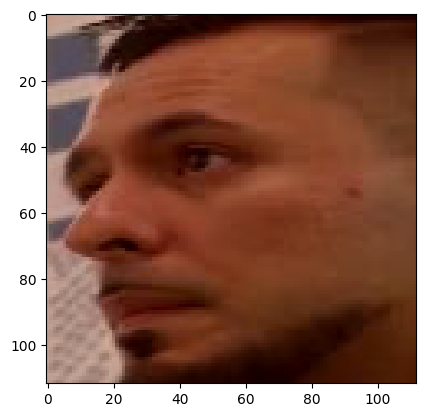

In [ ]:
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
# Load the labels from metadata.csv (has headers)
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DFD_Final_year/metadata.csv')

# Normalize labels for consistency
labels["file_name"] = labels["file_name"].astype(str)
labels["label"] = labels["label"].str.upper().str.strip()

# Split video files into train and validation sets
train_videos = video_files[:int(0.8 * len(video_files))]
valid_videos = video_files[int(0.8 * len(video_files)):]

print("train:", len(train_videos))
print("test:", len(valid_videos))

# Count real and fake videos
print("TRAIN: Real:", number_of_real_and_fake_videos(train_videos)[0],
      "Fake:", number_of_real_and_fake_videos(train_videos)[1])
print("TEST: Real:", number_of_real_and_fake_videos(valid_videos)[0],
      "Fake:", number_of_real_and_fake_videos(valid_videos)[1])

# Define image transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Instantiate the datasets
train_data = VideoDataset(train_videos, labels, sequence_length=10, transform=train_transforms)
val_data = VideoDataset(valid_videos, labels, sequence_length=10, transform=test_transforms)

# Load data into DataLoaders
train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

# Plot a sample frame from the first video in train set
image, label = train_data[2]
im_plot(image[2])


In [ ]:
import os
import numpy as np
import pandas as pd

def custom_train_test_split(video_list, labels_df,
                            train_real_count=242, train_fake_count=242,
                            test_real_count=29, test_fake_count=93):
    real_videos = []
    fake_videos = []

    # Separate real and fake videos
    for vid_path in video_list:
        file_name = os.path.basename(vid_path)
        match = labels_df[labels_df["file_name"] == file_name]

        if not match.empty:
            label = match["label"].values[0].strip().upper()
            if label == "REAL":
                real_videos.append(vid_path)
            elif label == "FAKE":
                fake_videos.append(vid_path)

    # Shuffle before sampling
    np.random.shuffle(real_videos)
    np.random.shuffle(fake_videos)

    # Sample desired counts
    train_real = real_videos[:train_real_count]
    test_real = real_videos[train_real_count:train_real_count + test_real_count]

    train_fake = fake_videos[:train_fake_count]
    test_fake = fake_videos[train_fake_count:train_fake_count + test_fake_count]

    # Combine and shuffle train/test
    train_videos = train_real + train_fake
    test_videos = test_real + test_fake

    np.random.shuffle(train_videos)
    np.random.shuffle(test_videos)

    return train_videos, test_videos

In [ ]:
# Load metadata
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DFD_Final_year/metadata.csv')

# Get all video paths
# Example: video_files = glob.glob('/content/drive/My Drive/videos/*.mp4')
# Make sure your `video_files` list is ready

train_videos, valid_videos = custom_train_test_split(video_files, labels)

# Check results
print("TRAIN: Real:", number_of_real_and_fake_videos(train_videos)[0],
      "Fake:", number_of_real_and_fake_videos(train_videos)[1])
print("TEST: Real:", number_of_real_and_fake_videos(valid_videos)[0],
      "Fake:", number_of_real_and_fake_videos(valid_videos)[1])

TRAIN: Real: 173 Fake: 0
TEST: Real: 0 Fake: 0


In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 137MB/s]


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 34 / 35] [Loss: 0.121079, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000076, Acc: 100.00%]
Accuracy 100.0
[Epoch 2/20] [Batch 34 / 35] [Loss: 0.110623, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000028, Acc: 100.00%]
Accuracy 100.0
[Epoch 3/20] [Batch 34 / 35] [Loss: 0.110598, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000032, Acc: 100.00%]
Accuracy 100.0
[Epoch 4/20] [Batch 34 / 35] [Loss: 0.120617, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000016, Acc: 100.00%]
Accuracy 100.0
[Epoch 5/20] [Batch 34 / 35] [Loss: 0.115565, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000012, Acc: 100.00%]
Accuracy 100.0
[Epoch 6/20] [Batch 34 / 35] [Loss: 0.140682, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000008, Acc: 100.00%]
Accuracy 100.0
[Epoch 7/20] [Batch 34 / 35] [Loss: 0.105510, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000009, Acc: 100.00%]
Accuracy 100.0
[Epoch 8/20] [Batch 34 / 35] [Loss: 0.080394, Acc: 100.00%]Testing
[Batch 8 / 9]  [Loss: 0.000007, Acc: 

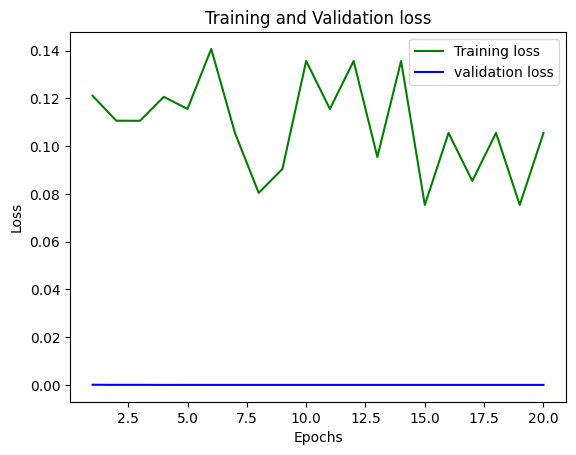

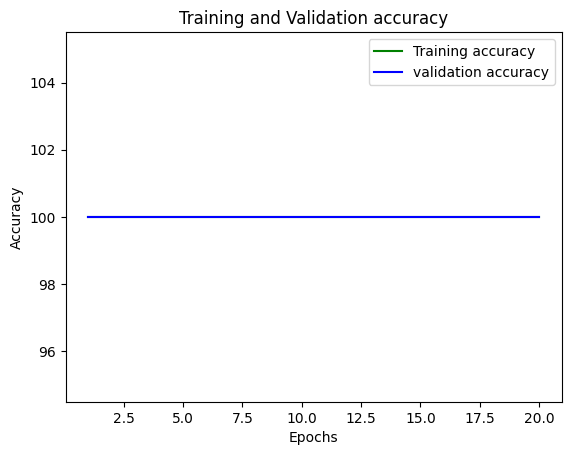

[[35]]


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
#print(confusion_matrix(true,pred))